In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix, distOutputLayer
#from lps_toolbox.metrics.classification import sp_index
from Functions.StatFunctions import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle

from sklearn.preprocessing import LabelEncoder

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import md5, sha

path_classif = os.environ['CLASSIFICATION_RESULTS']
path_figures_classif = os.environ['CLASSIFICATION_FIGURES']

df_bd_all = pd.read_csv(path_classif+'/bd.csv')

Using TensorFlow backend.


In [2]:
database = '31classes'
qtd_class = database[:2]

class_name = ['{0:02d}_specialist'.format(i) for i in range(int(qtd_class))]

In [3]:
df_bd_all.head()

,PCD,analysis_name,batch_size,callbacks,database,dev,hash,hidden_activation,learning_rate,loss,...,n_folds,n_inits,n_neurons,observation,optmizerAlgorithm,output_activation,path,type_arq,version,weight
0,False,Classification,32,NaN,24classes,0,5bfc737449ee6456cac4cab9f98fe170ecc557e4e43c95...,tanh,NaN,mean_squared_error,...,10,10,10,NaN,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,NaN,1
1,False,Classification,512,NaN,24classes,0,320bfda004a9386b284d95a8cf59f215df9a469377d060...,tanh,NaN,mean_squared_error,...,10,3,30,NaN,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,NaN,1
2,False,Classification,32,NaN,24classes,1,b25c24ef3f5d7149688a176b37363718c76f2f7c583119...,tanh,NaN,mean_squared_error,...,10,10,10,NaN,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,NaN,1
3,False,Classification,512,NaN,24classes,0,ffa8a89bea9ffca89975d49398b045b028ce084cab9f1a...,tanh,NaN,mean_squared_error,...,10,3,10,NaN,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,Hierarquica,NaN,1
4,False,Classification,512,NaN,24classes,0,ad53bfe756e7dde5146a2272a6b4d6887515ec6fb5bcaa...,tanh,NaN,mean_squared_error,...,10,10,10,NaN,adam,tanh,/home/venancio/Workspace/SonarAnalysis/Results...,MLP,NaN,1


In [4]:
#analise de apenas uma rede em especifico
# Cuidado, apenas usar isso em caso de já ter escolhido o n_neuronios e tem ciencia de qual o melhor
if database=='31classes':
    query_analyse = 'database==\'31classes\' & type_arq==\'Especialista\' & batch_size==64 & n_neurons=='
if database=='24classes':
    query_analyse = 'database==\'24classes\' & type_arq==\'Especialista\' & batch_size==512 & n_neurons==5 & n_inits==3'

n_folds=10    
files = {}
files_fold = {}
eff_ech_class = {}
# file_hier = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

df_bd_all = pd.read_csv(path_classif+'/bd.csv')
df_bd = df_bd_all.query(query_analyse)
print df_bd.drop(['hash','path'],axis=1)
path_result = df_bd.path.values[0]


file_Spec = path_result
tese_goltz = path_figures_classif + '/{0}'.format(df_bd.hash.values[0])
# neurons_hierarqNet = []
# for ineuron in range_neurons:
#     path = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,ineuron,batch)
    
#     neurons_hierarqNet.append(path)



# tese_goltz = path_figures_classif +  '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

    
if not os.path.exists(tese_goltz):
    os.mkdir(tese_goltz)

      PCD   analysis_name  batch_size  \
61  False  Classification         512   

                                            callbacks   database  dev  \
61  ['MetricsAdd', 'EarlyStoppingKeras', 'ModelChe...  24classes    0   

   hidden_activation  learning_rate                loss metrics  n_epochs  \
61              tanh            NaN  mean_squared_error     acc      1000   

    n_folds  n_inits  n_neurons observation optmizerAlgorithm  \
61       10        3          5         NaN              adam   

   output_activation      type_arq version  weight  
61              tanh  Especialista     NaN       1  


In [7]:
# for analysis of all neurons

if database=='31classes':
    query = 'database==\'31classes\' & type_arq==\'Especialista\' & batch_size==64 & n_inits==3'
    batch=64
if database=='24classes':
    query = 'database==\'24classes\' & type_arq==\'Especialista\' & batch_size==512 & n_inits==3'
    batch=512
    
init = 10
all_folds = [0,1,2,3,4,6,8,9]
n_folds = 10   

neurons_hierarqNet = {}

df_bd = df_bd_all.query(query)
for row in df_bd[['n_neurons','path']].itertuples():
    neurons_hierarqNet[row.n_neurons] = row.path
    
print list(sorted(neurons_hierarqNet.iteritems()))
path_figures = path_figures_classif + '/Specialist_%s_%s_neurons_%i_init_%i_fold_%s_batch'%(database,'_'.join(map(str,neurons_hierarqNet.keys())),init,len(all_folds),batch)

if not os.path.exists(path_figures):
    os.mkdir(path_figures)

[(5, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/26ecee25c14d4c8f42f225281d27095e83f1f75a70acd0016e3f811c6f2fe65d'), (10, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/30927ea0af8e5428ce77d3794554816c1c2b268bebce30c2bd11070908b55a6d'), (20, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/ee1a24f157f2d765126dc7dfd4fc8a1f6e56f98a4c04ff4d1dbfd3851593cd05'), (50, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889'), (100, '/home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80')]


In [5]:
#check the folders
for key, values in neurons_hierarqNet.iteritems():
    for ifold in range(n_folds):
        for iclass in range(int(qtd_class)):
            path = values + '/fold{0:02d}'.format(ifold) + '/{0:02d}_specialist'.format(iclass)
            file = path + '/predict.csv'
            if not os.path.isfile(file):
                print 'neuron {0}: file {1} dont exists'.format(key, file)
    print ''

neuron 100: file /home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80/fold05/00_specialist/predict.csv dont exists
neuron 100: file /home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80/fold05/01_specialist/predict.csv dont exists
neuron 100: file /home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80/fold05/02_specialist/predict.csv dont exists
neuron 100: file /home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80/fold05/03_specialist/predict.csv dont exists
neuron 100: file /home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80/fold05/04_specialist/predict.csv dont exists
neuron 100: file /home/venancio/Workspace/SonarAnalysis

# Analise variando Neuronios

In [10]:
flag_tmp = True
file_actu = path_figures+'/sp_all.csv'

range_neurons = list(sorted(neurons_hierarqNet.keys()))

if not os.path.exists(file_actu):
    sp_all = []
    for iclass in class_name:
        for ineuron,path in sorted(neurons_hierarqNet.iteritems()):
            for ifold in all_folds:
                df_pred = pd.read_csv(path + '/fold0{0}'.format(ifold) + '/{0}'.format(iclass)+'/predict.csv')
                table_master = pd.read_csv(path+'/fold0{0}'.format(ifold)+'/master_table.csv')
                
                test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
                
                true = table_master.loc[test_id,iclass].values
                pred = np.argmax(df_pred.loc[test_id,:].values,axis=1)
                
                sp = sp_index(y_pred=pred,y_true=true)
                sp_all.append(sp)
                
            
        print "finished {}".format(iclass)
else:
    idxs = pd.MultiIndex.from_product(iterables=[["{0:02d}".format(int(i.split('_')[0])+1) for i in class_name],range_neurons,map(lambda x:x+1 ,all_folds)],names=['member','neurons','folds'])
    dft=pd.read_csv(file_actu,index_col=range(len(idxs.names)))#, index_col=0)
    dft.index = idxs
    flag_tmp = False

In [11]:
save=True

range_neurons = list(sorted(neurons_hierarqNet.keys()))

if flag_tmp:
    idxs = pd.MultiIndex.from_product(iterables=[["{0:02d}".format(int(i.split('_')[0])+1) for i in class_name],range_neurons,map(lambda x:x+1 ,all_folds)],names=['member','neurons','folds'])
    dft = pd.DataFrame({'SP':sp_all},index=idxs)

if (save)&(not os.path.exists(path_figures+'/sp_all.csv')):
    dft.to_csv(path_figures+'/sp_all.csv')

dft.head()

SP
member neurons folds          
01     5       1      0.850596
               2      0.829614
               3      0.868211
               4      0.886467
               5      0.809735

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/Specialist_31classes_100_50_10_20_5_neurons_10_init_8_fold_64_batch/SPXneuronXmember_1_2_3_4_5_6.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/Specialist_31classes_100_50_10_20_5_neurons_10_init_8_fold_64_batch/SPXneuronXmember_7_8_9_10_11_12.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/Specialist_31classes_100_50_10_20_5_neurons_10_init_8_fold_64_batch/SPXneuronXmember_13_14_15_16_17_18.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/Specialist_31classes_100_50_10_20_5_neurons_10_init_8_fold_64_batch/SPXneuronXmember_19_20_21_22_23_24.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/Specialist_31classes_100_50_10_20_5_neurons_10_init_8_fold_64_batch/SPXneuronXmember_25_26_27_28_29_30.png file

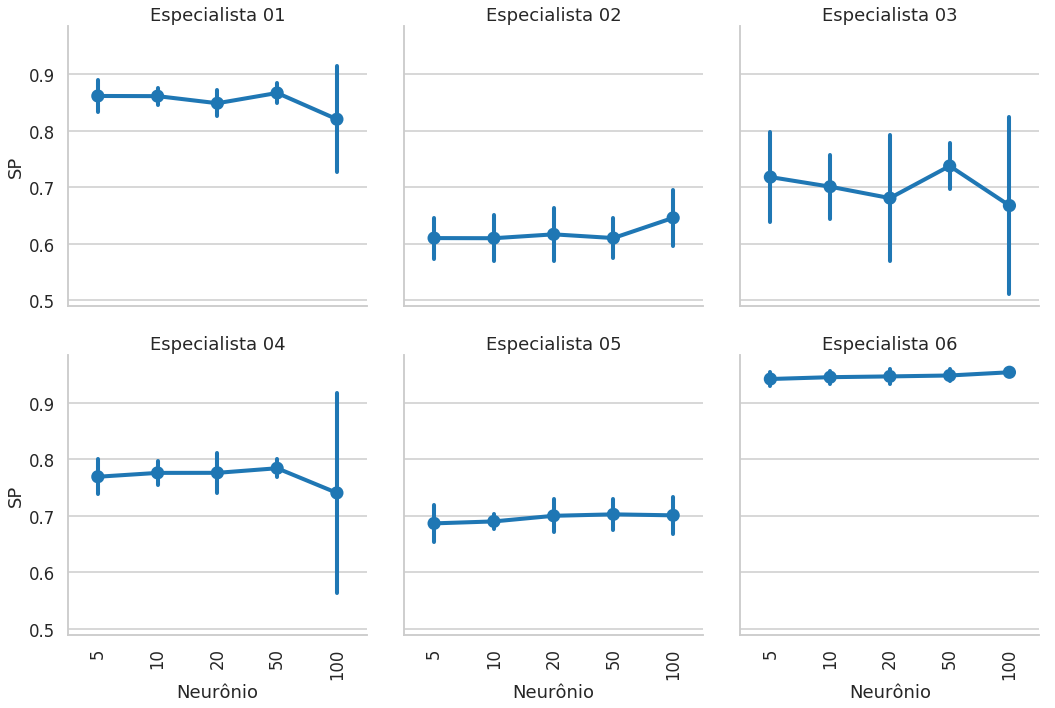

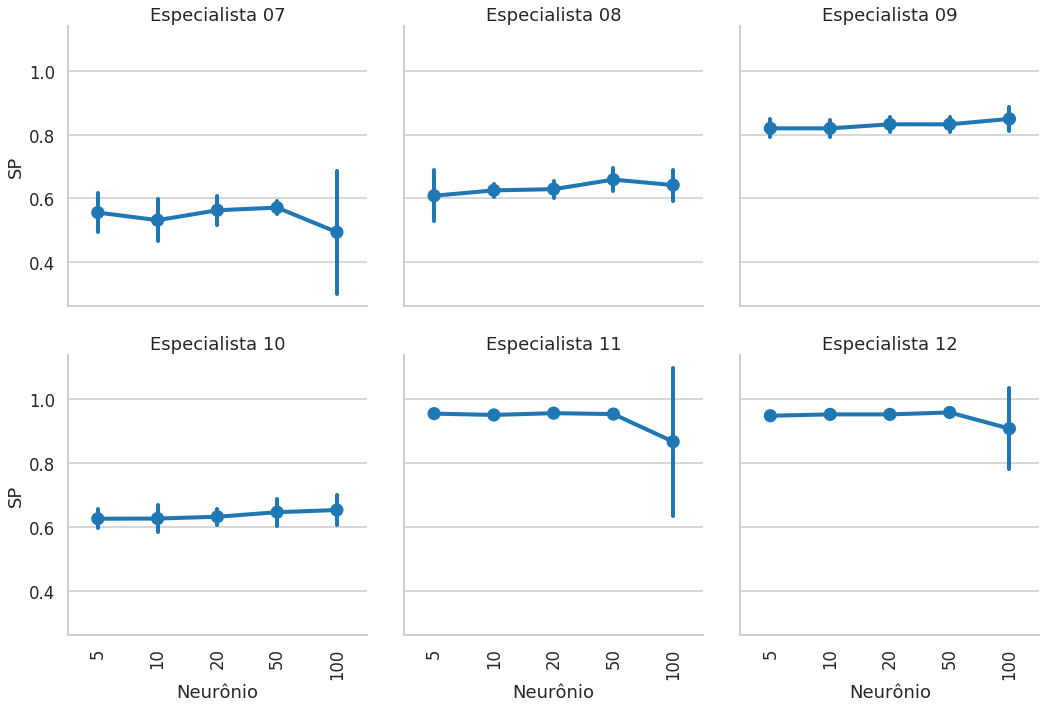

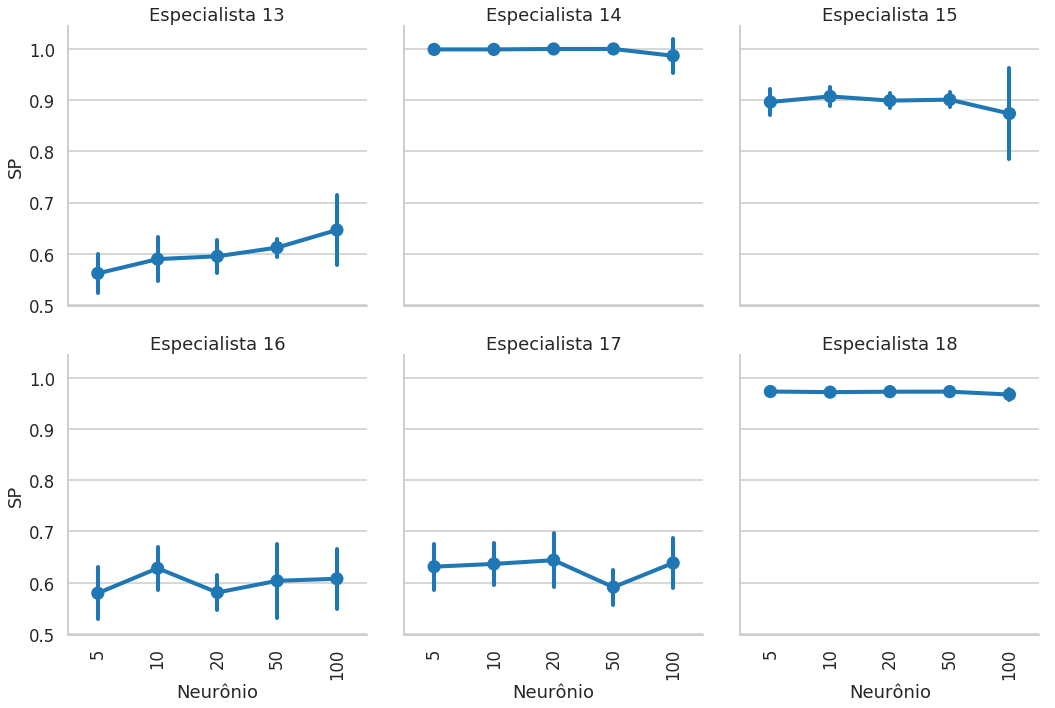

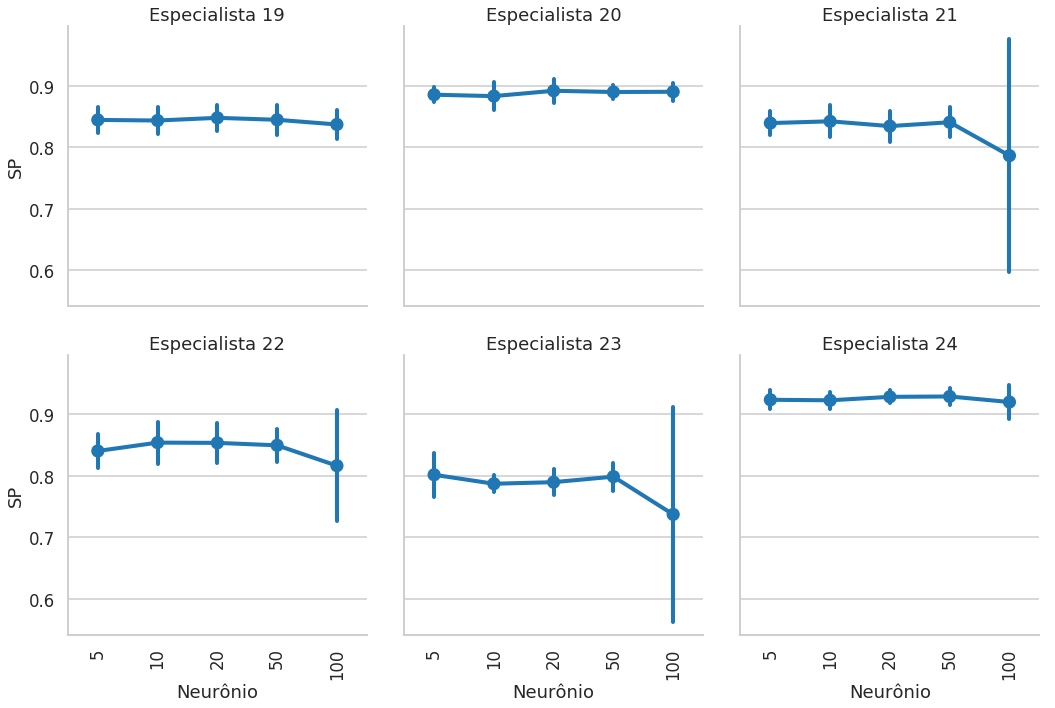

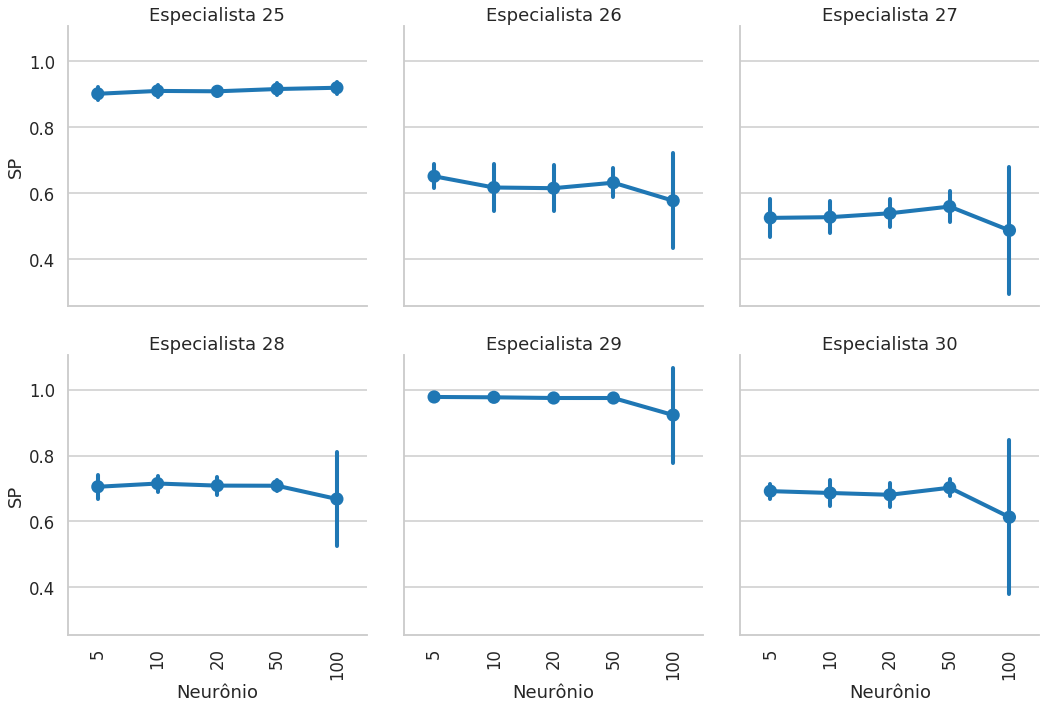

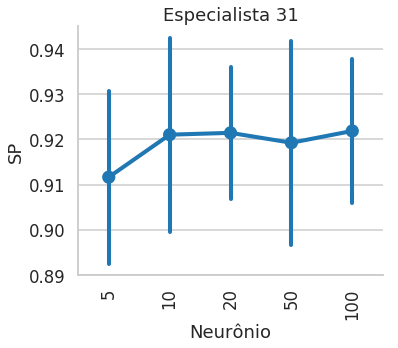

In [12]:
sns.set_style("whitegrid")
sns.set_context("talk")

if database=='31classes':
    group_members = range(1,32)
    slice_group = [group_members[i:i+6] for i in range(0,len(group_members),6)]
    
if database=='24classes':
    pass

for islice_group in slice_group:     
    members_query = ['member == \'{0:02d}\''.format(i) for i in islice_group]
    some_members = ' | '.join(members_query)

    dft_parts = dft.query(some_members)

    data = dft_parts.reset_index()

    g = sns.catplot(x="neurons", y="SP",col="member",col_wrap=3, kind="point", ci="sd",
                    data=data)
    g.set_titles("Especialista {col_name}")
    g.set_xticklabels(rotation=90)

    for ax in g.axes.flatten()[-3:]:
        ax.set_xlabel(u"Neurônio")


    if save:
        savefig(g,path_figures+'/SPXneuronXmember_' + '_'.join(map(lambda x: str(x),islice_group)) + '.png')
    
#     if save:
#         savefig(g,tese_goltz+'/SPXneuronXmember_' + '_'.join(map(lambda x: str(x),islice_group)) + '.png')

# criação de uma rede sintética de acordo com os números de neurônio

In [89]:
dft_mean = dft.mean(level=[0,1])
iteritems_especialista_neuronio = dft_mean.groupby(level=[0]).idxmax().SP.values
print "Melhores especialistas de cordo com o Número de Neuronios \n"
for ispecialist, ineuron in iteritems_especialista_neuronio:
    print 'Especialista {0}: {1}'.format(ispecialist, ineuron)

Melhores especialistas de cordo com o Número de Neuronios 

Especialista 01: 50
Especialista 02: 100
Especialista 03: 50
Especialista 04: 50
Especialista 05: 50
Especialista 06: 100
Especialista 07: 50
Especialista 08: 50
Especialista 09: 100
Especialista 10: 100
Especialista 11: 20
Especialista 12: 50
Especialista 13: 100
Especialista 14: 20
Especialista 15: 10
Especialista 16: 10
Especialista 17: 20
Especialista 18: 5
Especialista 19: 20
Especialista 20: 20
Especialista 21: 10
Especialista 22: 10
Especialista 23: 5
Especialista 24: 50
Especialista 25: 100
Especialista 26: 5
Especialista 27: 50
Especialista 28: 10
Especialista 29: 5
Especialista 30: 50
Especialista 31: 100


In [105]:
neurons_hierarqNet

{5: '/home/venancio/Workspace/SonarAnalysis/Results/Classification/26ecee25c14d4c8f42f225281d27095e83f1f75a70acd0016e3f811c6f2fe65d',
 10: '/home/venancio/Workspace/SonarAnalysis/Results/Classification/30927ea0af8e5428ce77d3794554816c1c2b268bebce30c2bd11070908b55a6d',
 20: '/home/venancio/Workspace/SonarAnalysis/Results/Classification/ee1a24f157f2d765126dc7dfd4fc8a1f6e56f98a4c04ff4d1dbfd3851593cd05',
 50: '/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889',
 100: '/home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80'}

In [95]:
path_classif

'/home/venancio/Workspace/SonarAnalysis/Results/Classification'

In [110]:
from shutil import copyfile
import json

path_classif_synthetic = path_classif + '/synthetic_specialist_{}_'.format(database) +'_'.join(map(lambda x:str(x),sorted(neurons_hierarqNet.keys()))) + '_neurons'

if not os.path.exists(path_classif_synthetic):
    os.makedirs(path_classif_synthetic)

#save the neurons' configuration of each specialist
with open(path_classif_synthetic + 'neurons_map.json','w') as outfile:
    json.dump(dict(iteritems_especialista_neuronio), outfile)

print('start creating synthetic network')
for ifold in all_folds:
    print('[+] start fold {0:02d}'.format(ifold))
    for ispecialist, ineuron in iteritems_especialista_neuronio:
        path = neurons_hierarqNet[ineuron]
        if ifold==0:
            print('specialist:{} - neuronio:{} - path:{}'.format(ispecialist,ineuron, path))
        
        path_model = path + '/fold{0:02d}'.format(ifold) + '/{0:02d}_specialist'.format(int(ispecialist)-1)+'/best_model.h5'
        path_model_new = path_classif_synthetic + '/fold{0:02d}'.format(ifold) + '/{0:02d}_specialist'.format(int(ispecialist)-1)
        
        if not os.path.exists(path_model_new):
            os.makedirs(path_model_new)
        
        copyfile(path_model,path_model_new + '/best_model.h5')
    
    path_master_table = path + '/fold{0:02d}'.format(ifold) + '/master_table.csv'
    path_master_table_new = path_classif_synthetic + '/fold{0:02d}'.format(ifold)
    
    if not os.path.exists(path_master_table_new):
        os.makedirs(path_master_table_new)
    
    copyfile(path_model,path_model_new + '/master_table.csv')
    print('[+] finish fold {0:02d}'.format(ifold))

start creating synthetic network
[+] start fold 00
specialist:01 - neuronio:50 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889
specialist:02 - neuronio:100 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177ad4117e7a8dfcbf01b1b68f80
specialist:03 - neuronio:50 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889
specialist:04 - neuronio:50 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889
specialist:05 - neuronio:50 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/256812b3ee4ac1ffc002428badaef3f8eea9f770d931ddfdda526df0b31cf889
specialist:06 - neuronio:100 - path:/home/venancio/Workspace/SonarAnalysis/Results/Classification/329a64b8b6a8c088b3069a3fa53b81a67473177a

In [ ]:
#creating importants files as predict.csv, pred_all.csv
from Functions.dataset.shipClasses import LoadData
from keras.model import load_model


data_ship = LoadData(database=database,dev=0)
mt_data,_ = data_ship.getData()

#preprocessing of signal

for ifold in all_folds:
    prpro = Preprocessing(limits='lin')
    X_train = prpro.set_transform(X=mt_data[train_id],fit=True).get_transform()
    Xall_train = prproc.set_transform(X=mt_data,fit=False).get_transform()
    
    for ispecialist, _ in iteritems_especialista_neuronio:
        path_model = path + '/fold{0:02d}'.format(ifold) + '/{0:02d}_specialist'.format(int(ispecialist)-1)+'/best_model.h5'
        
        model = load_model(path_model)
        model.predict()
    
    

In [ ]:
#If is everything ok with your synthetic network, upload the main file of the analysis
file_Spec = path_classif_synthetic

# SP final of Network for each Fold

In [ ]:
df_pred = {}
file_actu = file_Spec+'/SP.csv'
if not os.path.exists(file_actu):
    for ifold in all_folds:
        files_fold[ifold] = file_Spec + '/fold0{0}'.format(ifold)
        files_class = []
        for iclass in class_name:
            file = file_Spec + '/fold0{0}'.format(ifold) +'/'+iclass
            files_class.append(file)
        files[ifold] = files_class
        df_pred[ifold] = pd.read_csv(files_fold[ifold] + '/pred_all.csv')

    pred_df = pd.concat(df_pred)

    sp_folds = []
    for ifold in all_folds:
        pred = np.argmax(pred_df.loc[ifold].values,axis=1)
        table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
        test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
        true = table_master['target'].values
        sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])
        sp_folds.append(sp)
        #print("SP of fold {0}:{1:.2f}".format(ifold,sp))
    sp_df = pd.DataFrame({'SP':sp_folds},index=['fold {0}'.format(i)for i in range(10)]).round(3)
    sp_df.to_csv(file_actu)
else:
    sp_df = pd.read_csv(file_actu,index_col=0)
    
print sp_df
print("SP: {0:.3f} +- {1:.3f}".format(sp_df.mean()['SP'],sp_df.std()['SP']))
best_SP = sp_df.max()['SP']
best_fold = all_folds[int(sp_df.idxmax()['SP'].split(' ')[-1])]
print("best_SP: fold {} - sp {}".format(best_fold+1,best_SP))

with  open(path_figures+'/value_SP.txt', "w") as text_file:
    text_file.write("SP: {0:.2f} +- {1:.3f} \nbest_SP: fold {2} - sp {3}".format(sp_df.mean()['SP'],sp_df.std()['SP'],best_fold+1,best_SP))

with  open(tese_goltz+'/value_SP.txt', "w") as text_file:
    text_file.write("SP: {0:.2f} +- {1:.3f} \nbest_SP: fold {2} - sp {3}".format(sp_df.mean()['SP'],sp_df.std()['SP'],best_fold+1,best_SP))

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/00_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01_00_specialist_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/01_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01_01_specialist_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/02_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Cl

/home/venancio/sonarteste/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/20_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01_20_specialist_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/21_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01_21_specialist_train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/22_specialist/train.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Cl

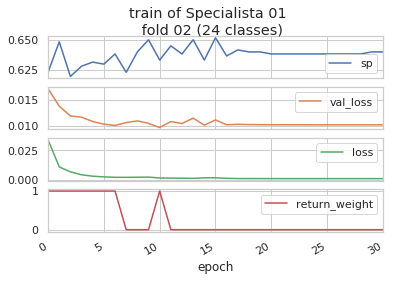

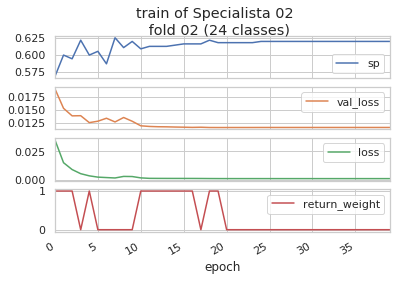

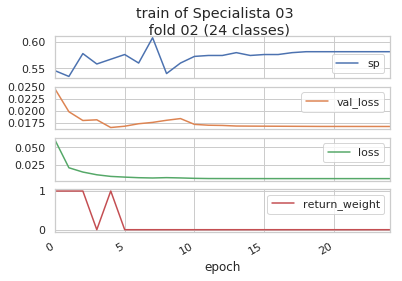

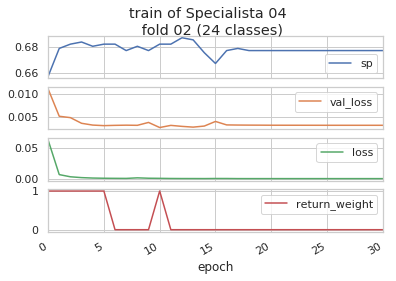

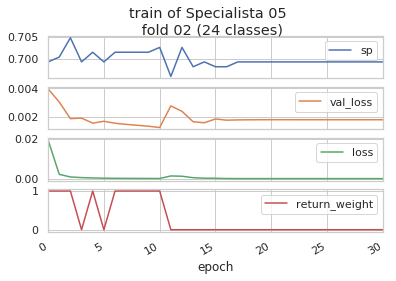

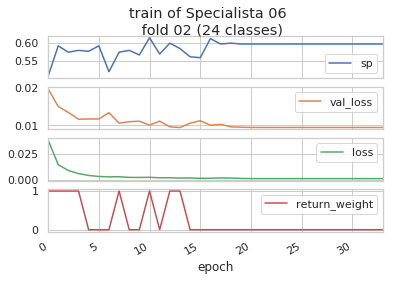

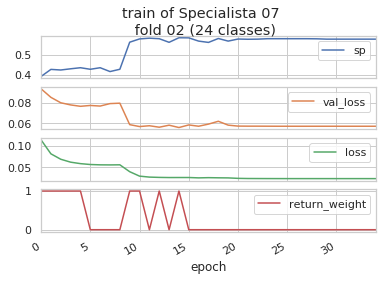

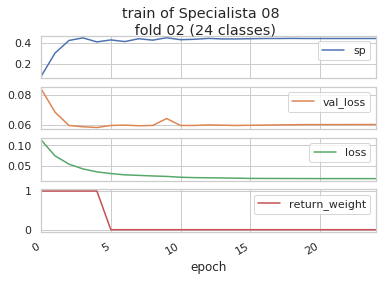

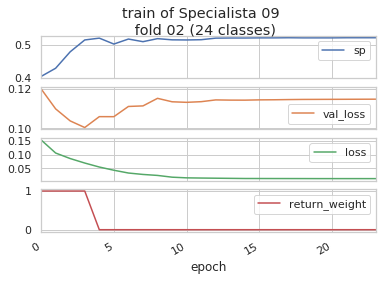

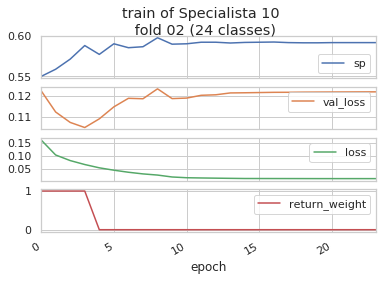

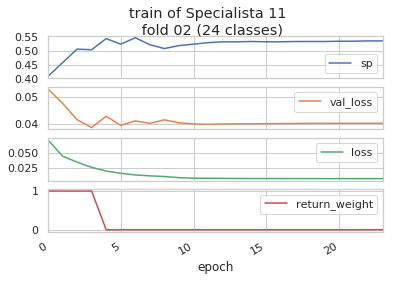

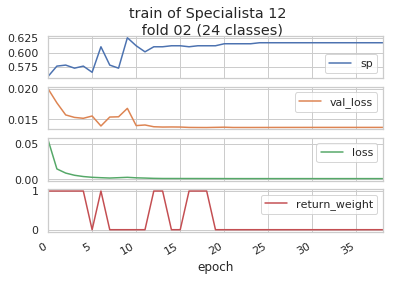

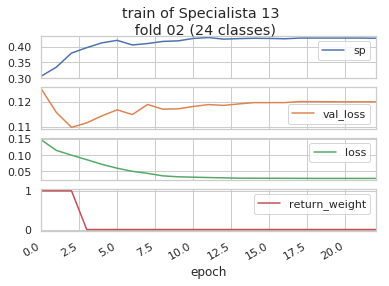

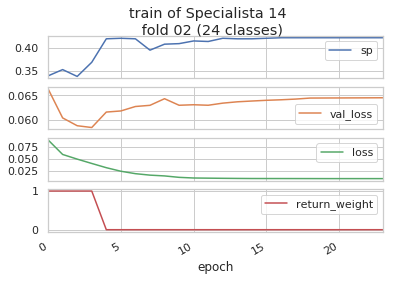

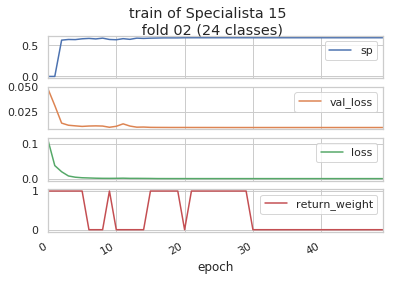

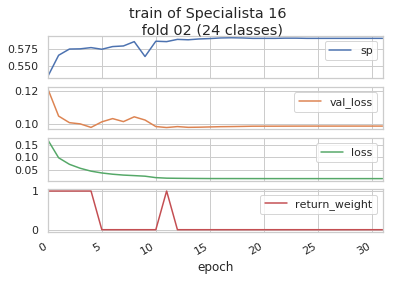

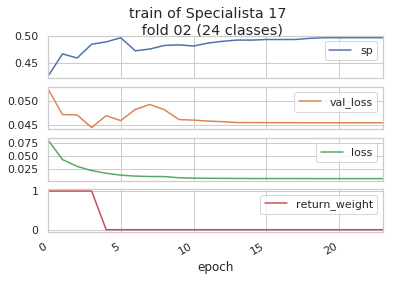

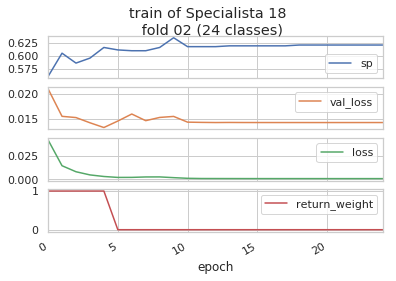

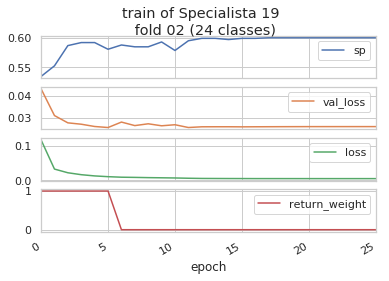

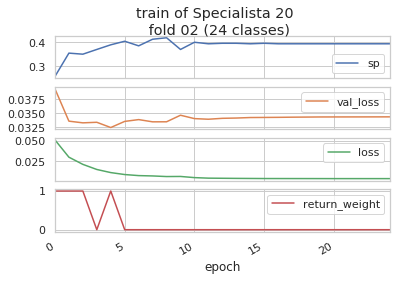

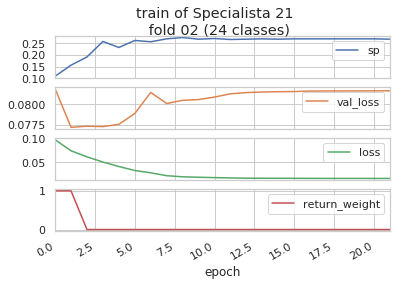

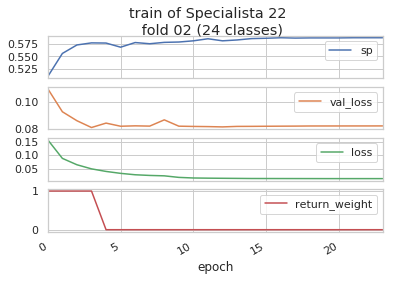

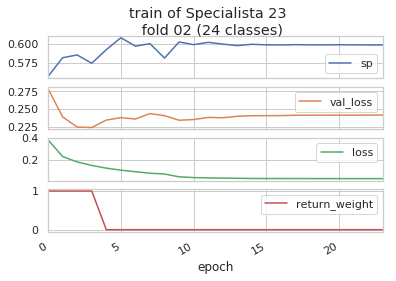

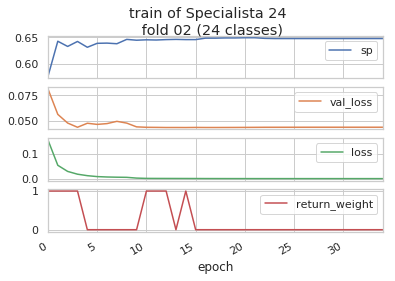

In [25]:
#train plot
import matplotlib.patches as patches
sns.set()
sns.set_style("whitegrid")
#sns.set_context("talk")

train_class = []
for ifold in [best_fold]:
    for iclass in class_name:
        
        df = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/log_train.csv')
        #train_class.append(df)
        
        plot = df.plot(x='epoch',y=['sp','val_loss','loss','return_weight'],
                grid=True,#figsize=(8,5),
                subplots=True,
                title='train of Specialista {0:02d} \n fold {1:02d} ({2} classes)'.format(int(iclass.split('_')[0])+1,ifold+1,qtd_class))#,ax=axes)
        
        
        fig = plot[0].get_figure()
       #fig.savefig("output.png")
        savefig(plt=fig,filename=file_Spec+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/train.png')
        #savefig(plt=fig,filename=file_hier+'/fold0{0}'.format(ifold)+'/{0}_train.png'.format(iclass))
        savefig(plt=fig,filename=tese_goltz+'/fold0{0}_{1}_train.png'.format(ifold,iclass))


finished 00_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/00_specialist/hist_outputNeuronXclass_fold1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/00_specialist_hist_outputNeuronXclass_fold2.png file
finished 01_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/01_specialist/hist_outputNeuronXclass_fold1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/01_specialist_hist_outputNeuronXclass_fold2.png file
finished 02_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc

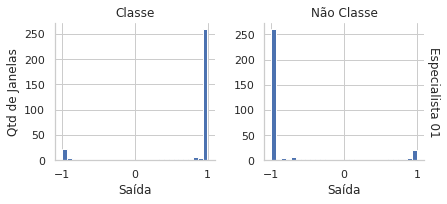

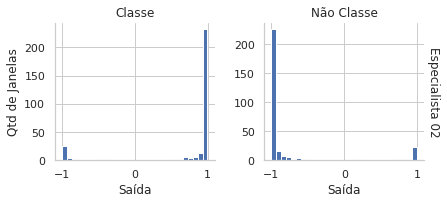

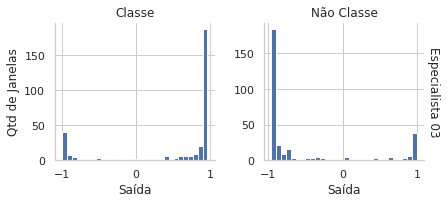

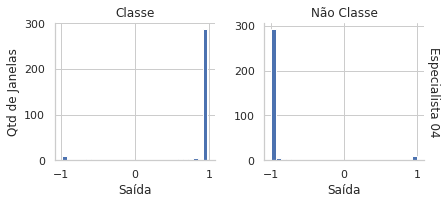

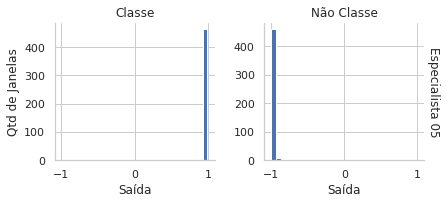

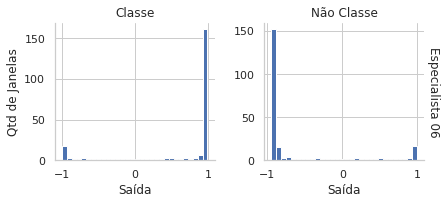

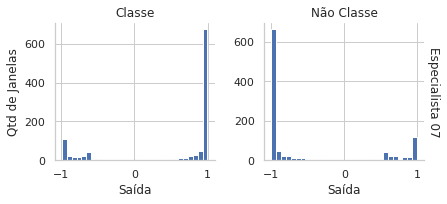

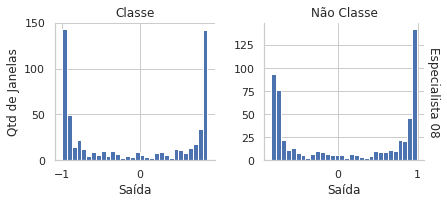

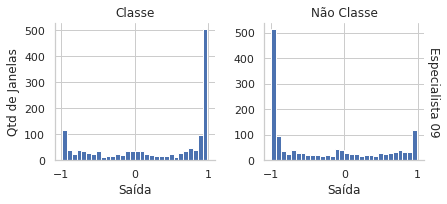

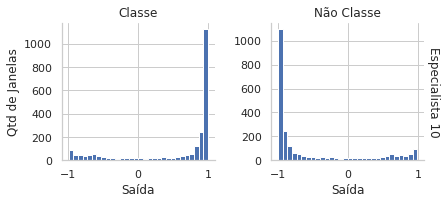

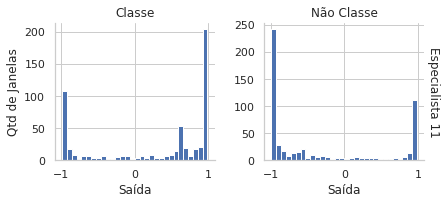

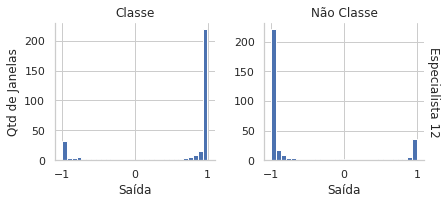

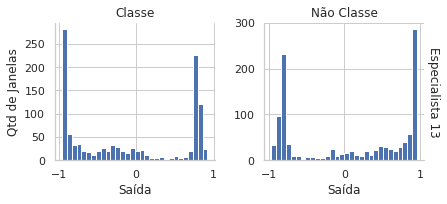

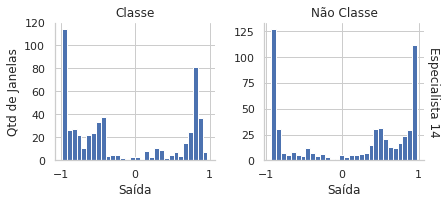

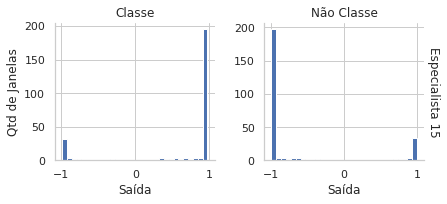

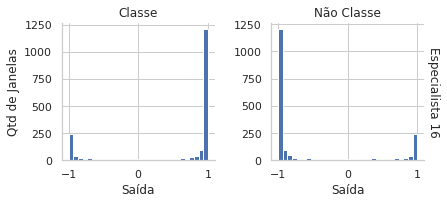

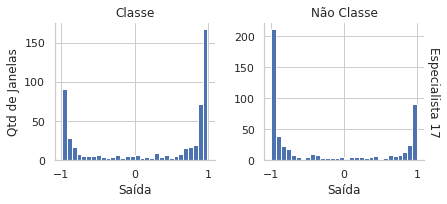

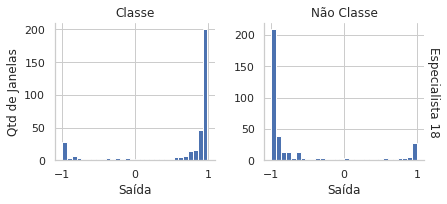

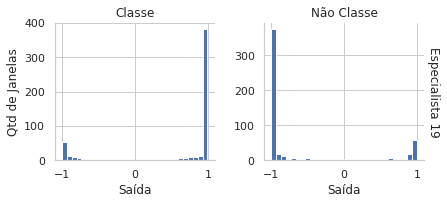

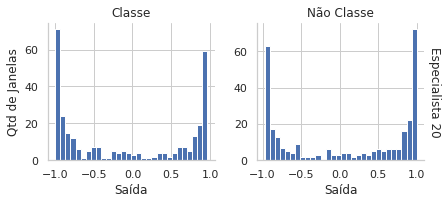

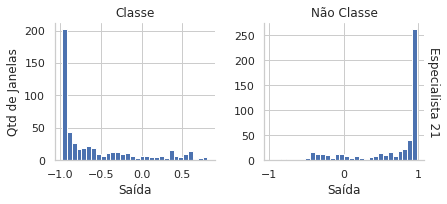

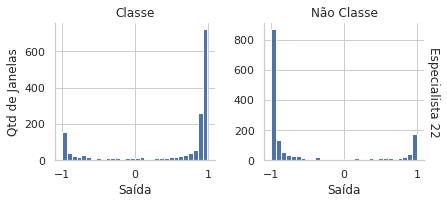

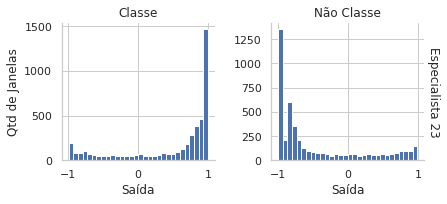

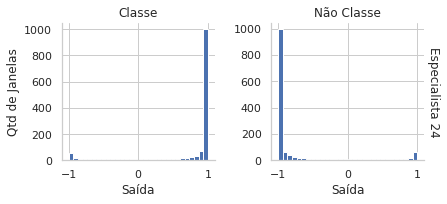

In [26]:
sns.set()
sns.set_style("whitegrid")

vl = []
class_spec = {}
for trgt, iclass in enumerate(class_name):
    for ifold in [best_fold]:#range(n_folds):
        df_pred = pd.read_csv(file_Spec + '/fold0{0}'.format(ifold) + '/{0}'.format(iclass)+'/predict.csv')
        table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
                
        test_id = table_master[(table_master['target']==trgt)&(table_master['fold_0{0}'.format(ifold)]==1)].index.values
        
        #df_pred[iclass] = table_master[iclass]
        
        tmp_df = df_pred.loc[test_id,:]
        class_spec[iclass.split('_')[0]]=tmp_df
        
    print "finished {}".format(iclass)
    tmp = pd.concat(class_spec)      
    tmp_df = tmp.reset_index()
    tmp_df.drop(['level_1'], axis=1)
    tmp2_df = pd.melt(tmp_df[tmp_df['level_0']==iclass.split('_')[0]], id_vars=['level_0'], value_vars=['neuron_1','neuron_0'])
# tmp2_df

    g = sns.FacetGrid(tmp2_df, col='variable', row="level_0",sharey=False,sharex=False,margin_titles=True)
    g = g.map(plt.hist,'value',bins=30)
    
    for iax in g.axes[:,0]:
        iax.set_ylabel('Qtd de Janelas')

    for iax in g.axes.flatten():
        iax.set_xlabel(u'Saída')
            
    for iax,iclass2 in zip(g.axes[0,:],["Classe",u'Não Classe']):
        iax.set_title('%s'%iclass2)
        
    iax = g.axes[:,-1][0]
    
    if iax.texts:
            # This contains the right ylabel text
            txt = iax.texts[0]
            iax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        u'Especialista {0:02d}'.format(trgt+1),
                        transform=iax.transAxes,
                        rotation=270,
                        va='center')
                        #fontsize='xx-large')
                # Remove the original text
            iax.texts[0].remove()
    
    
    savefig(g,file_Spec+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/hist_outputNeuronXclass_fold{0}.png'.format(ifold))
    savefig(plt=g,filename=tese_goltz+'/{0}_hist_outputNeuronXclass_fold{1}.png'.format(iclass,ifold+1))
    
      
    
# fig, ax = plt.subplots(figsize=(20,8))

# g = sns.violinplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax,palette="muted",cut=0, bw=.05)
# #g = sns.swarmplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax1,size=1)#,palette="muted")

# #g = sns.stripplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax, palette=sns.color_palette(['red','blue']), dodge=True ,alpha=0.2)
# #g = sns.boxenplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax)

# ax.axes.set_xlabel('Especialistas')
# ax.axes.set_ylabel(u'Valores da Saída Especialista')
# ax.set_xticklabels(["{0:02d}".format(int(i.split("_")[0])+1)for i in class_name])
# #g.legend(['classe','n_classe'])
# g.legend_.set_title('classe')
# new_labels = ['Sim', u'Não']
# for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
# plt.xticks(rotation=90)
# savefig(fig,file_Spec+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/cut_violine_outputNeuronXclass_fold{0}.png'.format(ifold))
# savefig(plt=fig,filename=tese_goltz+'/{0}_cut_violine_outputNeuronXclass_fold{1}.png'.format(iclass,ifold))

/home/venancio/sonarteste/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


finished 00_specialist
finished 01_specialist
finished 02_specialist
finished 03_specialist
finished 04_specialist
finished 05_specialist
finished 06_specialist
finished 07_specialist
finished 08_specialist
finished 09_specialist
finished 10_specialist
finished 11_specialist
finished 12_specialist
finished 13_specialist
finished 14_specialist
finished 15_specialist
finished 16_specialist
finished 17_specialist
finished 18_specialist
finished 19_specialist
finished 20_specialist
finished 21_specialist
finished 22_specialist
finished 23_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/fold01/23_specialist/cut_violine_outputNeuronXclass_fold1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/23_specialist_cut_violine_outputNeuronXclass_fold1.png file


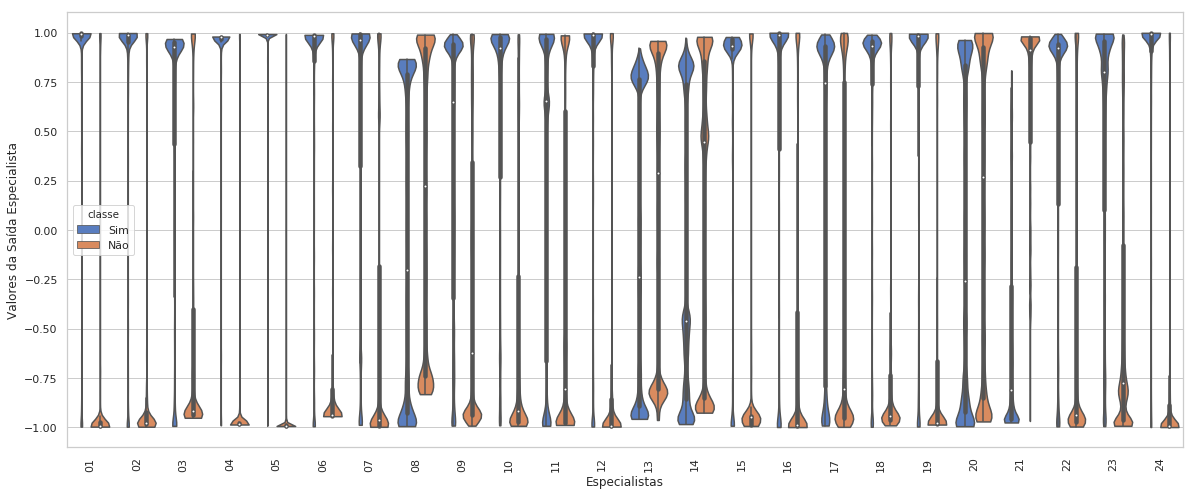

In [27]:
sns.set()
sns.set_style("whitegrid")

vl = []
class_spec = {}
for trgt, iclass in enumerate(class_name):
    for ifold in [best_fold]:#range(n_folds):
        df_pred = pd.read_csv(file_Spec + '/fold0{0}'.format(ifold) + '/{0}'.format(iclass)+'/predict.csv')
        table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
                
        test_id = table_master[(table_master['target']==trgt)*(table_master['fold_0{0}'.format(ifold)]==1)].index.values
        
        #df_pred[iclass] = table_master[iclass]
        
        tmp_df = df_pred.loc[test_id,:]
        class_spec[iclass.split('_')[0]]=tmp_df
        
    print "finished {}".format(iclass)
    tmp = pd.concat(class_spec)      
    tmp_df = tmp.reset_index()
    tmp_df.drop(['level_1'], axis=1)
    tmp2_df = pd.melt(tmp_df, id_vars=['level_0'], value_vars=['neuron_1','neuron_0'])
# tmp2_df

    #g = sns.FacetGrid(tmp2_df, col='variable', row="level_0",sharey=False,sharex=False,margin_titles=True)
    #g = g.map(plt.hist,'value',bins=10)
fig, ax = plt.subplots(figsize=(20,8))

g = sns.violinplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax,palette="muted",cut=0, bw=.05)
#g = sns.swarmplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax1,size=1)#,palette="muted")

#g = sns.stripplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax, palette=sns.color_palette(['red','blue']), dodge=True ,alpha=0.2)
#g = sns.boxenplot(x="level_0", y="value", hue="variable",data=tmp2_df,ax=ax)

ax.axes.set_xlabel('Especialistas')
ax.axes.set_ylabel(u'Valores da Saída Especialista')
ax.set_xticklabels(["{0:02d}".format(int(i.split("_")[0])+1)for i in class_name])
#g.legend(['classe','n_classe'])
g.legend_.set_title('classe')
new_labels = ['Sim', u'Não']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
plt.xticks(rotation=90)
savefig(fig,file_Spec+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/cut_violine_outputNeuronXclass_fold{0}.png'.format(ifold))
savefig(plt=fig,filename=tese_goltz+'/{0}_cut_violine_outputNeuronXclass_fold{1}.png'.format(iclass,ifold))
# print tmp_2.head()
#print tmp_df.head()
        
        
        
        
        
#         g = sns.FacetGrid(tmp2_df, col=iclass, row="variable",sharey=False,sharex=False,margin_titles=True)
#         g = g.map(plt.hist,'value',bins=10)
       
#         #plt.subplots_adjust(top=0.95)
#         #g.fig.suptitle(u"Quantidades de janelas na saída de cada neurônio do Classificador {0} (fold 0{0})".format(name,ifold))
        
#         for iax,iclass2 in zip(g.axes[:,0],name_classes):
#             iax.set_ylabel('Qtd de Janelas')

#         for iax,iclass2 in zip(g.axes.flatten(),len(name_classes)*name_classes):
#             #iax.set_title('Classe {0}'.format(iclass2))
#             iax.set_xlabel(u'Saída'.format(iclass2))
            
#         for iax,iclass2 in zip(g.axes[0,:],name_classes):
#             iax.set_title('Classe {0}'.format(iclass2))
        
#         for iax,iclass2 in zip(g.axes[:,-1],name_classes):
#             if iax.texts:
#                 # This contains the right ylabel text
#                 txt = iax.texts[0]
#                 iax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
#                         u'Neurônio \n Classe {0}'.format(iclass2),
#                         transform=iax.transAxes,
#                         rotation=270,
#                         va='center')
#                         #fontsize='xx-large')
#                 # Remove the original text
#                 iax.texts[0].remove()
                
#         savefig(g,file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/hist_outputNeuronXclass_fold{0}.png'.format(ifold))
#         savefig(plt=g,filename=tese_goltz+'/{0}_hist_outputNeuronXclass_fold{1}.png'.format(iclass,ifold))    

In [28]:
qtd_class

'24'

finished 00_specialist
finished 01_specialist
finished 02_specialist
finished 03_specialist
finished 04_specialist
finished 05_specialist
finished 06_specialist
finished 07_specialist
finished 08_specialist
finished 09_specialist
finished 10_specialist
finished 11_specialist
finished 12_specialist
finished 13_specialist
finished 14_specialist
finished 15_specialist
finished 16_specialist
finished 17_specialist
finished 18_specialist
finished 19_specialist
finished 20_specialist
finished 21_specialist
finished 22_specialist
finished 23_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/SP_each_classes_pt.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/SP_cada_especialista_pt.png file


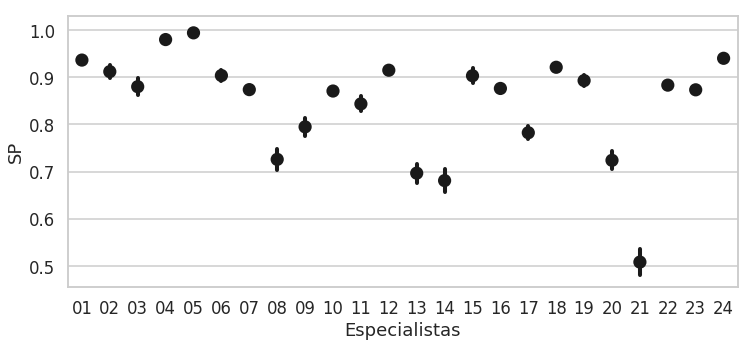

In [29]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("talk")

sp_all = []
for iclass in class_name :
    for ifold in range(n_folds):
        df_pred = pd.read_csv(file_Spec + '/fold0{0}'.format(ifold) + '/{0}'.format(iclass)+'/predict.csv')
        table_master = pd.read_csv(file_Spec +'/fold0{0}'.format(ifold)+'/master_table.csv')
                
        test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
                
        true = table_master.loc[test_id,iclass].values
        pred = np.argmax(df_pred.loc[test_id,:].values,axis=1)
                
        sp = sp_index(y_pred=pred,y_true=true)
        sp_all.append(sp)
    print "finished {}".format(iclass)

idxs = pd.MultiIndex.from_product(iterables=[["{0:02d}".format(i) for i in range(1,int(qtd_class)+1)],range(1,11)],names=['Especialista','folds'])

dft = pd.DataFrame({'SP':sp_all},index=idxs)
data = dft.reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.pointplot(x="Especialista", y=u'SP',markers='o', kind="line", ci="sd", data=data, color='k', markerfacecolor='g', linestyles=' ', ax=ax)

#ax.set_title(u"Classe Hierarquica",fontsize=15)
ax.set_xlabel(u"Especialistas")
#ax.axes.set_xticklabels(["{0:02d}".format(i) for i in range(1,len(qtd_class)+1)])

savefig(plt,file_Spec +'/SP_each_classes_pt.png')
savefig(plt=plt,filename=tese_goltz+'/SP_cada_especialista_pt.png')

finished 00_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns_Especialista01.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns_Especialista01.png file
finished 01_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns_Especialista02.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns_Especialista02.png file
finished 02_specialist
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/

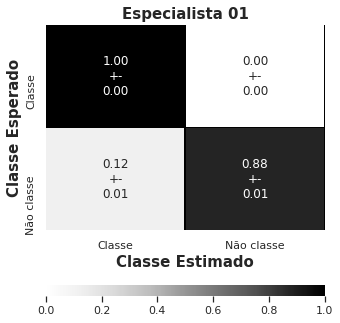

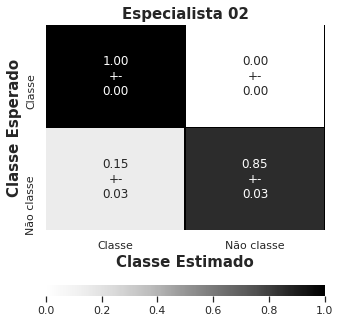

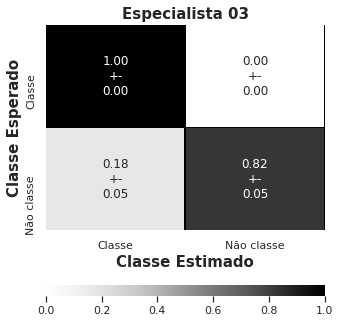

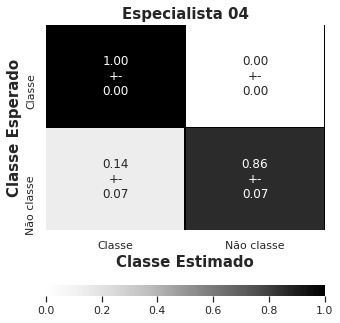

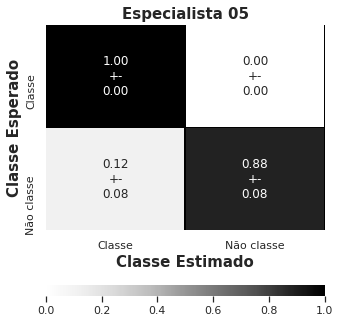

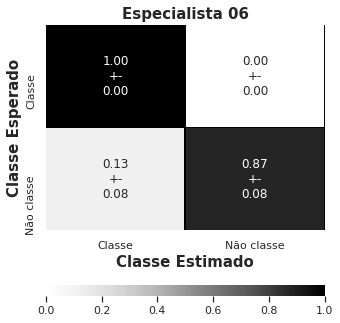

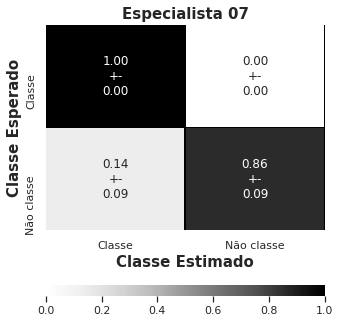

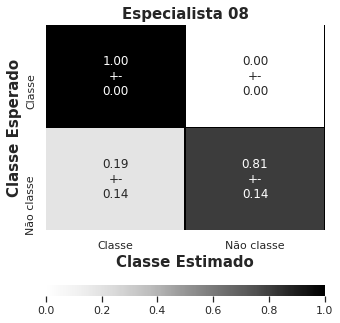

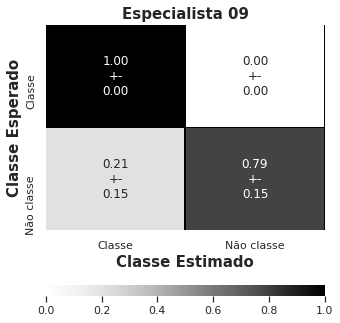

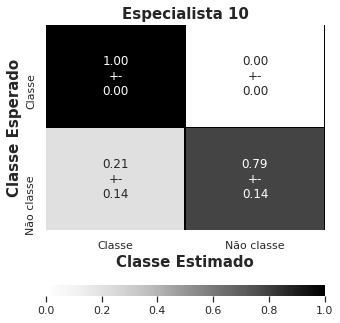

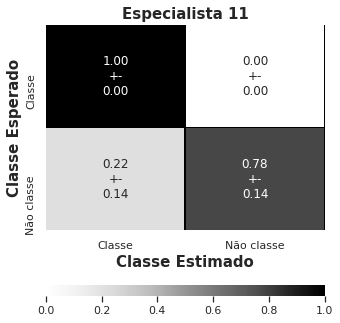

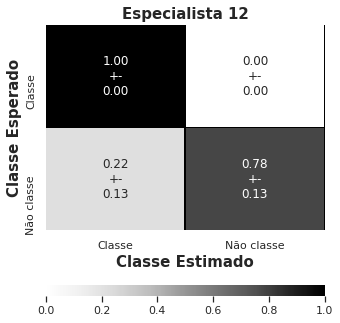

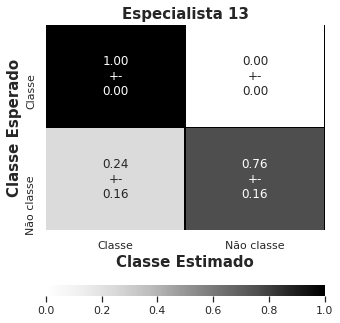

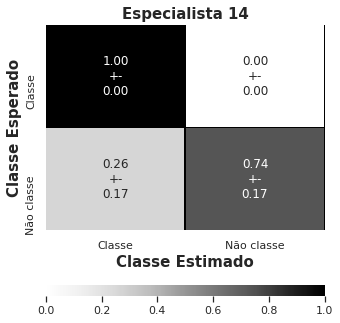

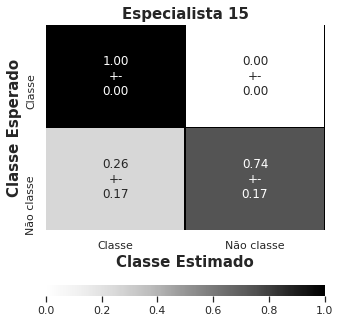

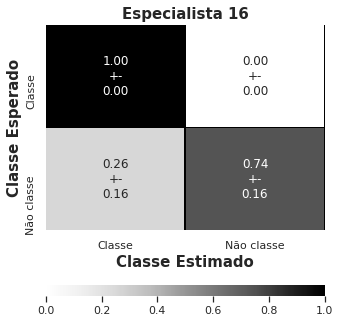

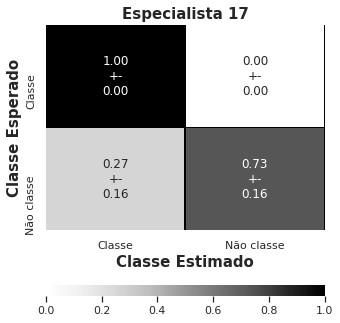

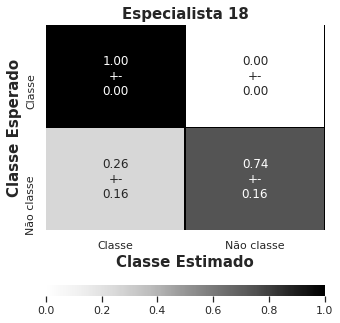

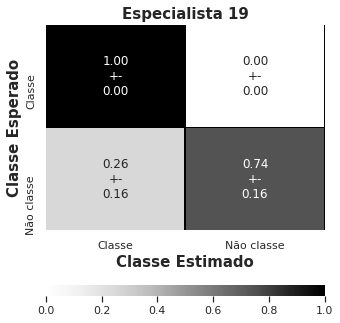

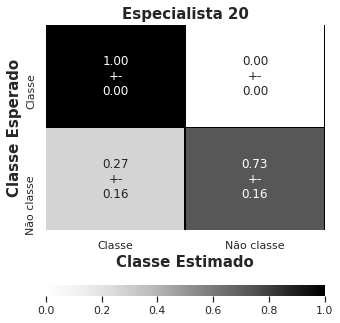

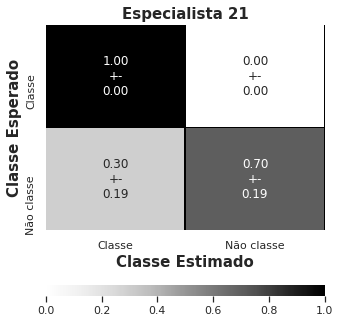

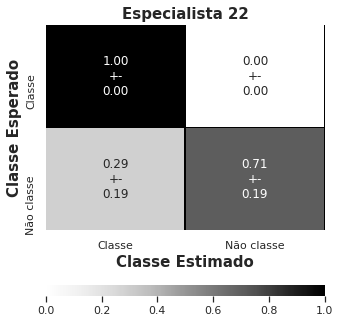

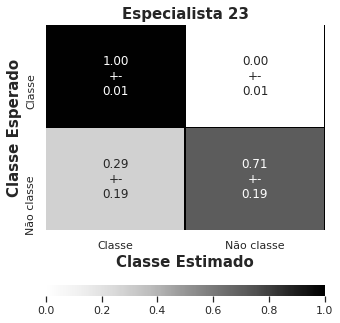

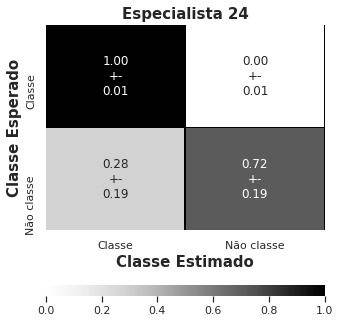

In [45]:
sns.set()
sns.set_style("whitegrid")


# cm_folds = []
# for ifold in range(n_folds):
#     table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
#     df_pred = pd.read_csv(file_Spec +'/fold0{0}'.format(ifold)+ '/pred_all.csv')
    
#     test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    
#     pred = np.argmax(df_pred.values,axis=1)
#     true = table_master['target'].values
    
#     confusionMatrix = confusion_matrix(y_pred=pred[test_id],y_true=true[test_id])
#     cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    
#     cm_folds.append(cm_norm)


cm_folds = []
for inum,iclass in enumerate(class_name) :
    for ifold in range(n_folds):
        df_pred = pd.read_csv(file_Spec + '/fold0{0}'.format(ifold) + '/{0}'.format(iclass)+'/predict.csv')
        table_master = pd.read_csv(file_Spec +'/fold0{0}'.format(ifold)+'/master_table.csv')
                
        test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
                
        true = table_master.loc[test_id,iclass].values
        pred = np.argmax(df_pred.loc[test_id,:].values,axis=1)
                
        confusionMatrix = confusion_matrix(y_pred=pred,y_true=true)
        cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    
        cm_folds.append(cm_norm)
        
    print "finished {}".format(iclass)
    
    xy_size = 5
#     fig = plt.figure(figsize=(xy_size,xy_size))
#     ax = fig.add_subplot(111)
#     ax.set_aspect(1)

    grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
    f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(xy_size,xy_size))
    
    #cbar_ax = fig.add_axes([.905, .3, .05, .3])

    snsConfusionMatrix(cm_norm=cm_folds,ax=ax,
                       ylabel_kwg={'ylabel':'Classe Esperado'},
                       xlabel_kwg={'xlabel':'Classe Estimado'},
                       title_kwg={'label':u'Especialista {0:02d}'.format(inum+1)},
                       x_labels=['Classe',u'Não classe'],
                       y_labels=['Classe',u'Não classe'],
                       sns_kwg={'cbar_ax':cbar_ax,'cbar':True, 'cbar_kws':{"orientation": "horizontal"} })
    
    fig_cm = file_Spec + '/confusion_matrix_sns_Especialista{0:02d}.png'.format(inum+1)
    savefig(f,fig_cm)
    savefig(plt=plt,filename=tese_goltz+'/confusion_matrix_sns_Especialista{0:02d}.png'.format(inum+1))

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/confusion_matrix_sns.png file


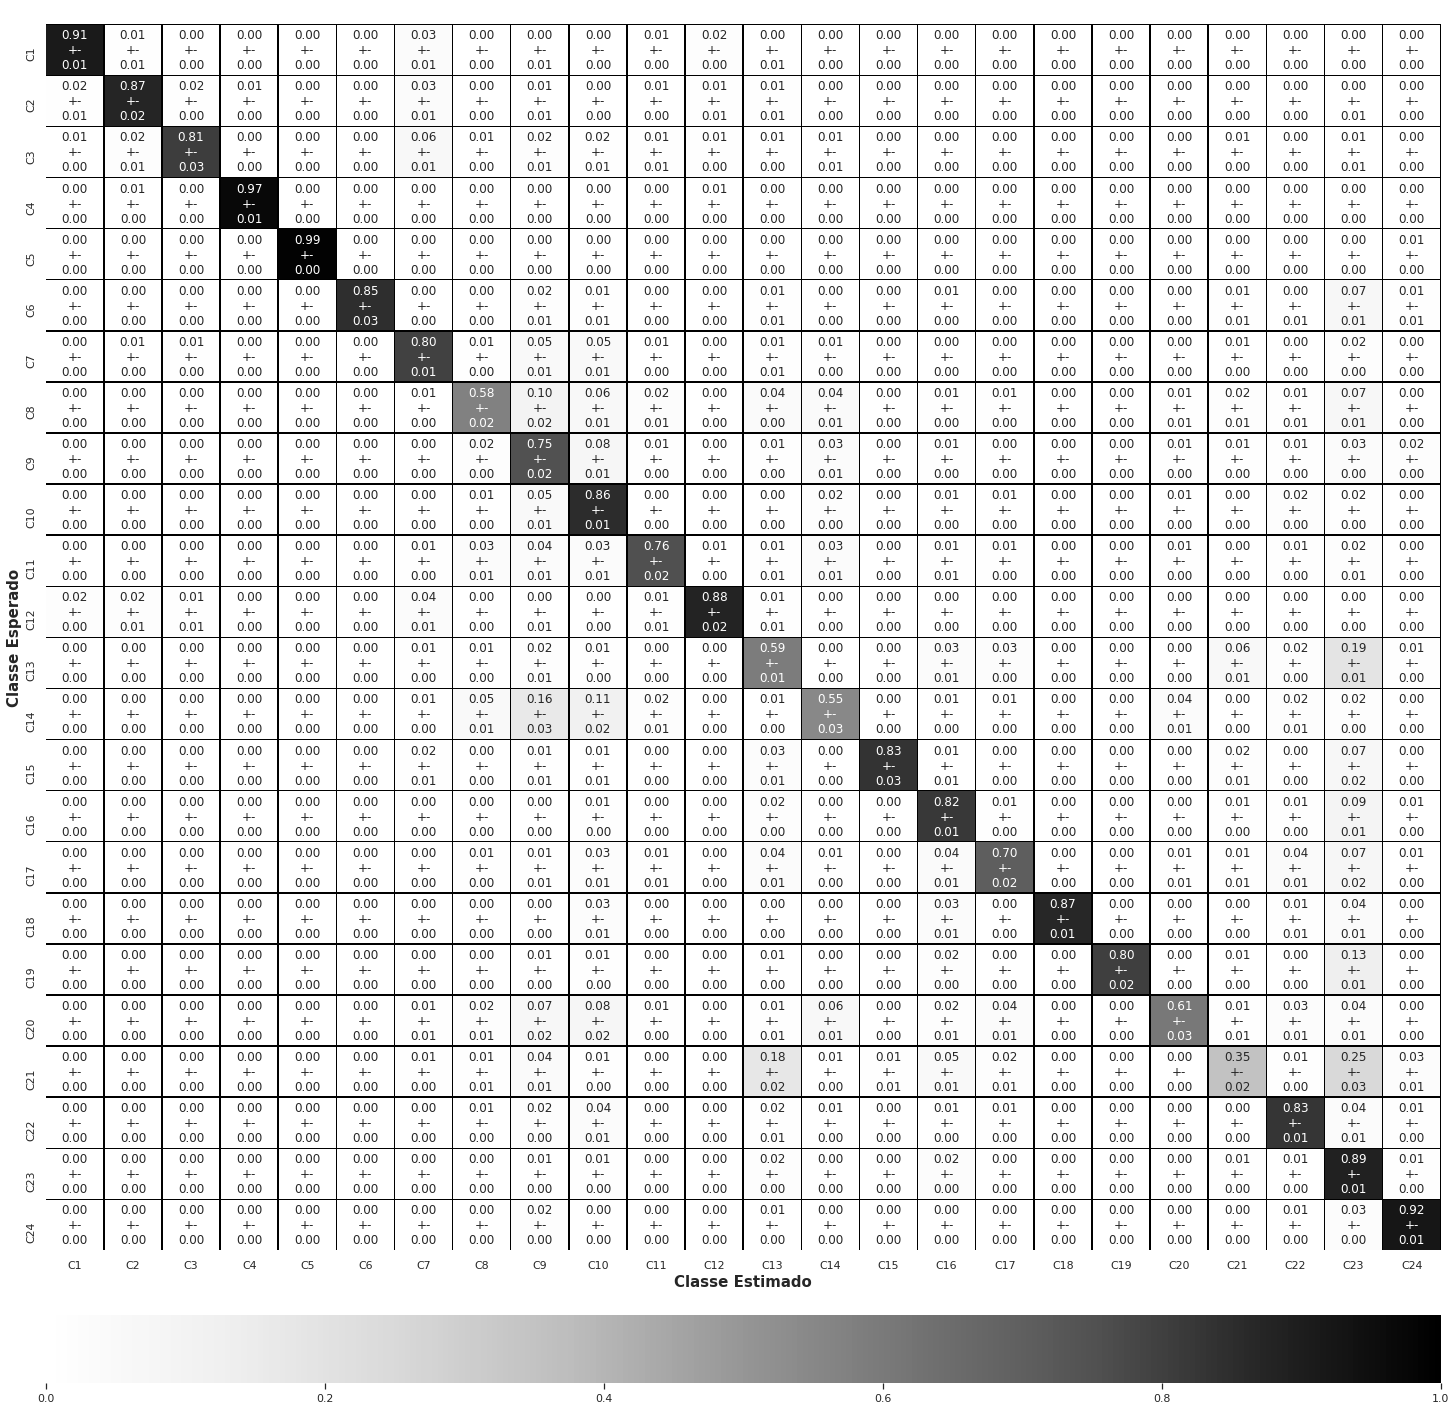

In [53]:
#fig, ax = plt.subplots(figsize=(30,30))

#plotConfusionMatrix(pred, true, class_labels=['Classe {0:02d}'.format(i+1) for i in range(24)], ax=ax)
#work with only pred_df and table_master
sns.set()
sns.set_style("whitegrid")


cm_folds = []
for ifold in range(n_folds):
    table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
    df_pred = pd.read_csv(file_Spec +'/fold0{0}'.format(ifold)+ '/pred_all.csv')
    
    test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    
    pred = np.argmax(df_pred.values,axis=1)
    true = table_master['target'].values
    
    confusionMatrix = confusion_matrix(y_pred=pred[test_id],y_true=true[test_id])
    cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    
    cm_folds.append(cm_norm)
    
if database=='31classes':
    fig_size = 25
else:
    fig_size = 25

    
# ax = fig.add_subplot(111)
# ax.set_aspect(1)

# cbar_ax = fig.add_axes([.905, .3, .05, .3])

grid_kws = {"height_ratios": (.9, .05), "hspace": .1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(fig_size,fig_size))

snsConfusionMatrix(cm_norm=cm_folds,ax=ax,title_kwg={'label':" "},
                   ylabel_kwg={'ylabel':'Classe Esperado'},
                   xlabel_kwg={'xlabel':'Classe Estimado'},
                   x_labels=['C{0}'.format(i+1) for i in range(int(qtd_class))],
                   y_labels=['C{0}'.format(i+1) for i in range(int(qtd_class))],
                   sns_kwg={'cbar_ax':cbar_ax,'cbar':True, 'cbar_kws':{"orientation": "horizontal"} })

#plt.title('Confusion matrix of HierarqNet using MLP as estimator',fontsize=20,fontweight="bold")
fig_cm = file_Spec + '/confusion_matrix_sns.png'
savefig(fig,fig_cm)
savefig(plt=plt,filename=tese_goltz+'/confusion_matrix_sns.png')

# Eficiencia da Rede

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Eficiencia_Especialista.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Eficiencia_Especialista.png file


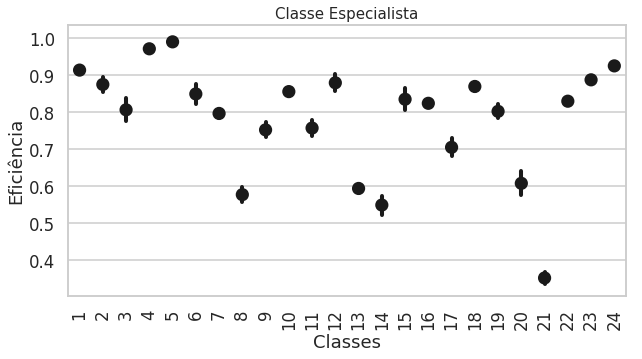

In [54]:
from sklearn.metrics import recall_score

sns.set()
sns.set_style("whitegrid")

recall_all = []
for ifold in range(n_folds):
    table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
    df_pred = pd.read_csv(file_Spec +'/fold0{0}'.format(ifold)+ '/pred_all.csv')
    
    test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    
    pred_test = np.argmax(df_pred.values,axis=1)
    true_test = table_master['target'].values
    
    #sp = sp_index(y_pred=pred_test,y_true=true_test)
    recall = recall_score(y_pred=pred_test[test_id],y_true=true_test[test_id],average=None)
    
    [recall_all.append(i)for i in recall]


idxs = pd.MultiIndex.from_product(iterables=[range(1,n_folds+1),range(1,len(recall)+1)],names=['folds','Classes'])
df_test = pd.DataFrame({u'Eficiência':recall_all},index=idxs)

sns.set_style("whitegrid")
sns.set_context("talk")

data = df_test.reset_index()#query("member=='class_B'").reset_index()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

g = sns.pointplot(x="Classes", y=u'Eficiência',markers='o', kind="line", ci="sd", data=data, color='k', markerfacecolor='g', linestyles=' ', ax=ax)

#g.grid()

for item in g.get_xticklabels():
    item.set_rotation(90)

ax.set_title(u"Classe Especialista",fontsize=15)

fig_cm = file_Spec + '/Eficiencia_Especialista.png'
savefig(fig,fig_cm)
savefig(plt=plt,filename=tese_goltz+'/Eficiencia_Especialista.png')

# Comparação com o Hierarquico

In [55]:
save_flag = True

list_tuple = []
count_values = []
for iclass in range(int(qtd_class)):
    for ifold in range(n_folds):
        
        df_pred = pd.read_csv(file_Spec + '/fold0{0}'.format(ifold) + '/pred_all.csv')
        
        table_master = pd.read_csv(file_Spec+'/fold0{0}'.format(ifold)+'/master_table.csv')
        
        id = table_master[(table_master['target']==iclass)&(table_master['fold_0{0}'.format(ifold)]==1)].index.values
        
        table_master['pred'] = np.argmax(df_pred.values,axis=1)
        
        n_windows = table_master.loc[id,:]['pred'].shape[0]
        x = table_master.loc[id,:]['pred'].value_counts().index.values
        y = table_master.loc[id,:]['pred'].value_counts().values
        
        for ix,iy in zip(x,y):
            list_tuple.append((iclass+1,ifold+1,ix+1))
            count_values.append(iy)    
        
    print "Finish {}".format(iclass)

idx = pd.MultiIndex.from_tuples(tuples=list_tuple,names=['refClasse','folds','classe'])
df_preCLass = pd.DataFrame({'Qtd de Janelas':count_values},index=idx)

Finish 0
Finish 1
Finish 2
Finish 3
Finish 4
Finish 5
Finish 6
Finish 7
Finish 8
Finish 9
Finish 10
Finish 11
Finish 12
Finish 13
Finish 14
Finish 15
Finish 16
Finish 17
Finish 18
Finish 19
Finish 20
Finish 21
Finish 22
Finish 23


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Histograma_ativacao_classe_1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Histograma_ativacao_classe_1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Histograma_ativacao_classe_2.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Histograma_ativacao_classe_2.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/93cc2932a90ed2cddcc647adc7e8e0ecfee38f3dc223d4d83411050dcd7c34d7/Histograma_ativacao_classe_3.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/

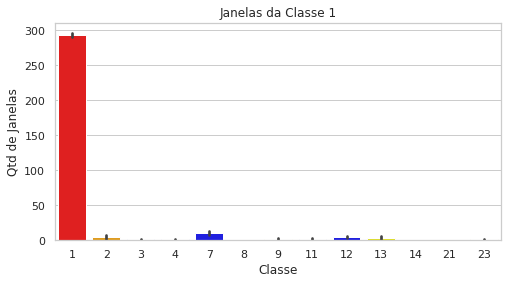

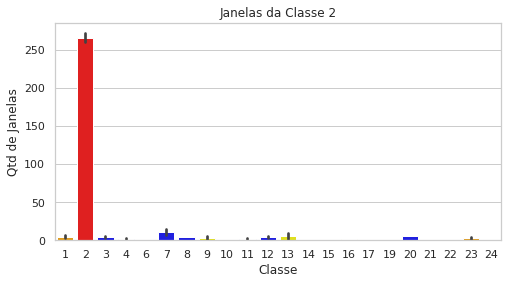

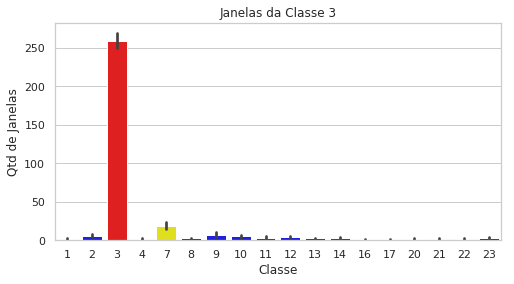

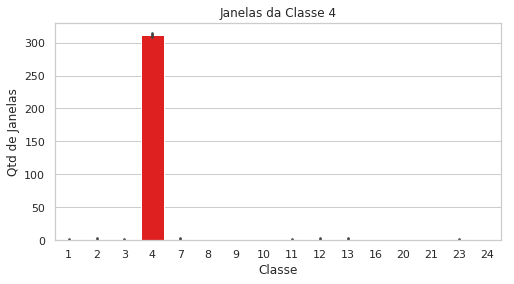

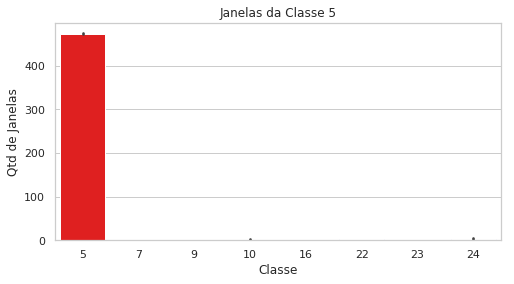

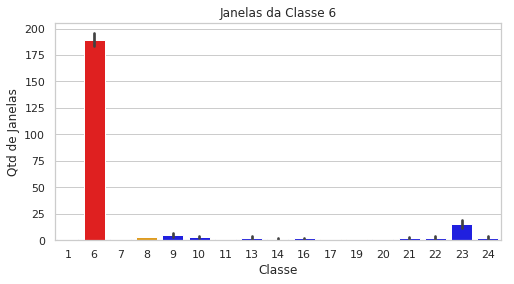

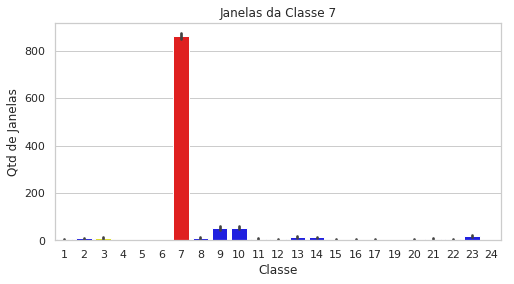

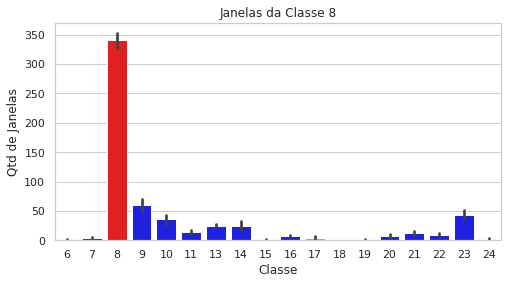

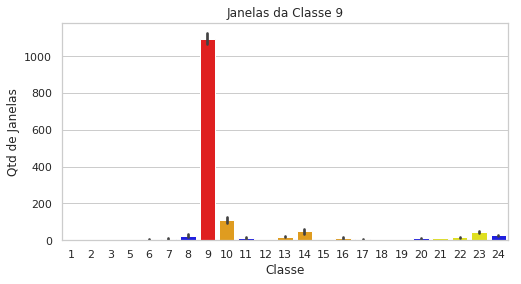

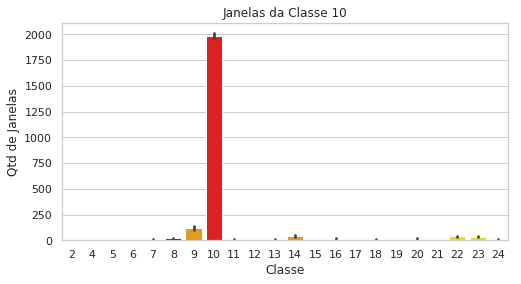

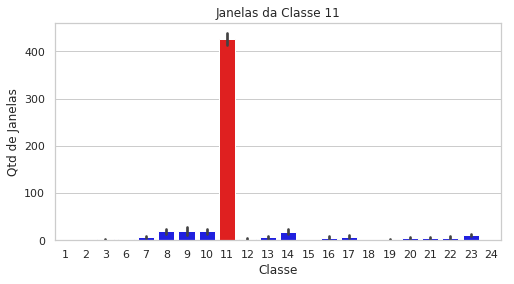

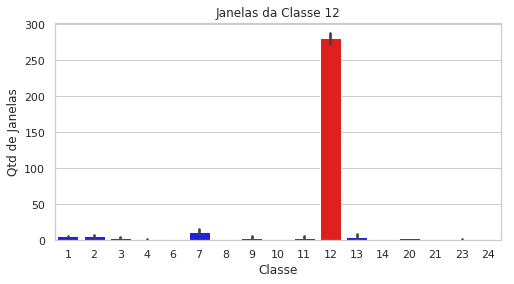

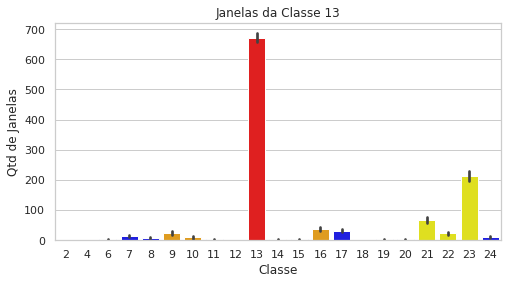

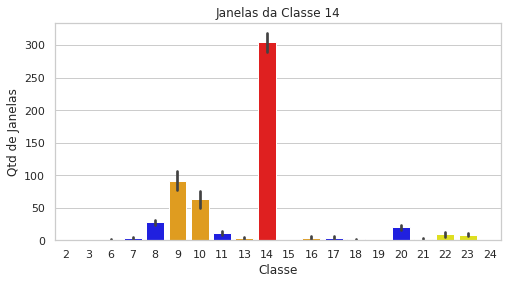

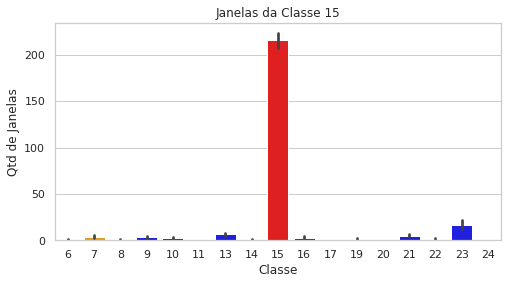

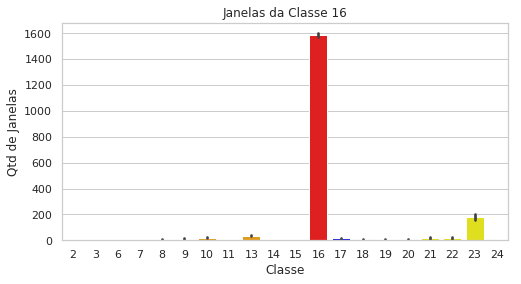

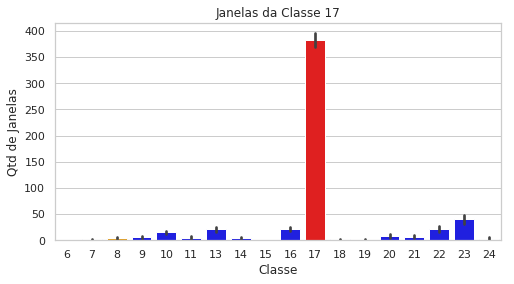

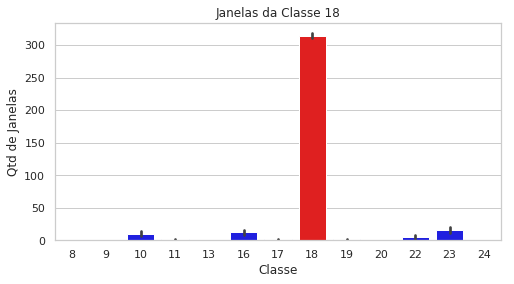

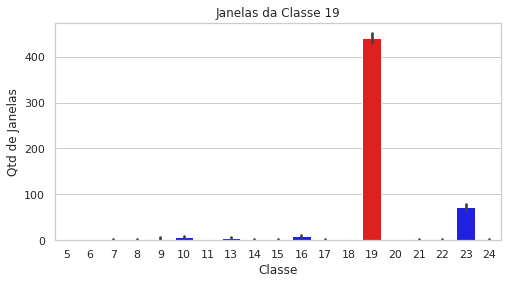

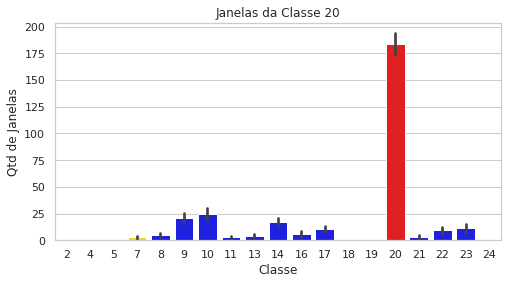

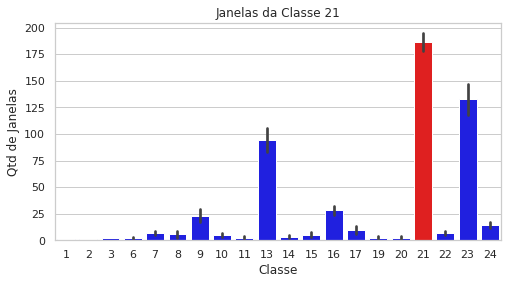

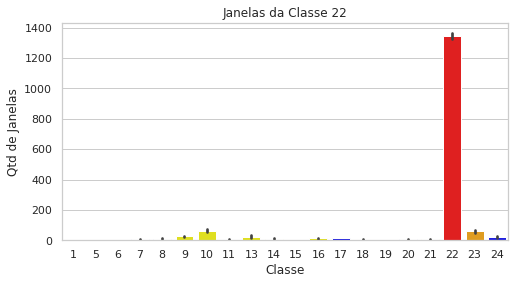

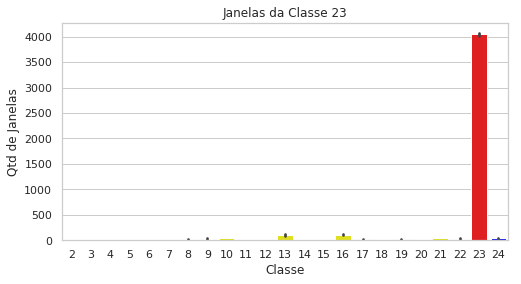

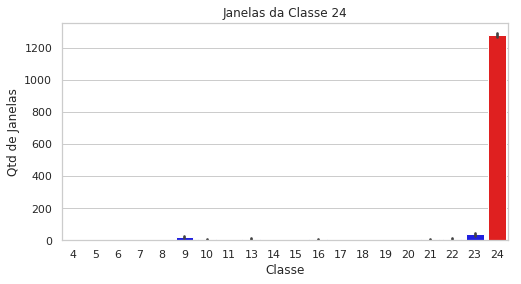

In [56]:
sns.set()
sns.set_style("whitegrid")


data = df_preCLass.reset_index()

if database=='31classes':
    same_lvl = []
    lvl_above = []
    
    for iclass in range(1,int(qtd_class)+1):
        lvl_above.append([])
        if iclass in range(1,5):
            same_lvl.append(range(1,5))
            
        
        if iclass in [5,6,12,16,17]:
            same_lvl.append([])
           
        
        if iclass in range(7,12):
            same_lvl.append(range(7,12))
            
        if iclass in range(13,16):
            same_lvl.append(range(13,16))
        
        if iclass in range(18,32):
            same_lvl.append(range(18,32))
        
else:    
    same_lvl = []
    lvl_above = []
    
    for iclass in range(1,int(qtd_class)+1):
        #AB
        if iclass in [1,2,22,23]:
            same_lvl.append([1,2,22,23])
            lvl_above.append([9,10,13,14,16,1,2,22,23,21])
        #DB
        if iclass in [3,18,20]:
            same_lvl.append([3,18,20])
            lvl_above.append([5,7,15])
        #DA    
        if iclass in [5,7,15]:
            same_lvl.append([5,7,15])
            lvl_above.append([3,18,20])
        
        #B
        if iclass in [4,6,8,12,17,19]:
            same_lvl.append([4,6,8,12,17,19])
            lvl_above.append([])
            
        #C
        if iclass in [11,24]:
            same_lvl.append([11,24])
            lvl_above.append([])
           
        #AA
        if iclass in [9,10,13,14,16]:
            same_lvl.append([9,10,13,14,16])
            lvl_above.append([9,10,13,14,16,1,2,22,23,21])
            
        #AC
        if iclass in [21]:
            same_lvl.append([])
            lvl_above.append([])
        

for iclass,isame,iabove in zip(range(int(qtd_class)),same_lvl,lvl_above):
    idata = data[data['refClasse']==iclass+1]
    all_classes = sorted(idata.classe.unique())
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
    ax = axes
    
    colors = []
    for i in np.unique(idata['classe']):
        color='blue'
        
        if i in iabove:
            color = 'yellow'
        
        if i in isame:
            color = 'orange'
        
        if i==(iclass+1):
            color = 'red'
            
        colors.append(color)
            
    g = sns.barplot(y='Qtd de Janelas',x='classe',ax=ax,data=idata,ci='sd',palette=sns.color_palette(colors))
    g.set_xlabel('Classe')
    g.set_title('Janelas da Classe {}'.format(iclass+1))
    
    if save_flag: savefig(fig, file_Spec +  '/Histograma_ativacao_classe_{0}.png'.format(iclass+1))
    if save_flag: savefig(plt=fig,filename=tese_goltz+'/Histograma_ativacao_classe_{0}.png'.format(iclass+1))